In [1]:
!pip install ucimlrepo



In [2]:

from ucimlrepo import fetch_ucirepo 
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import load_linnerud
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LinearRegression,Ridge
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import re
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")



C:\Users\s160811\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Task 1 (5 points): Regression

##### Dataset: Superconductivity 
* Number of records: 21263 
* Number of features: 81 + 1 (target/output feature) 
* Repository URL: https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

##### Problems
__a.__ Train two regression models to predict the critical temperature. Report the score with the default parameters of each model.\
__b.__ Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained scores as a function of the chosen parameter. Plot the coefficient magnitudes for the best obtained model.

# Answer_Task-1


In [3]:
superconductivty_data = fetch_ucirepo(id=464) 

#split into target and featuires
y  = superconductivty_data.data.targets 
X= superconductivty_data.data.features 

In [4]:
X.info()

# 81 columns, 21263 observations, no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [5]:
y.info()

# critical temperature is the target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   critical_temp  21263 non-null  float64
dtypes: float64(1)
memory usage: 166.2 KB


### Task-1(a)

In [6]:
#split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Scaling X and y. its usual in linear regression to scale continuous target variable too 
Scaler_X=StandardScaler()
Scaler_X.fit(X_train)
Scaler_y=StandardScaler()
Scaler_y.fit(y_train)

X_train_scaled=Scaler_X.transform(X_train)
X_test_scaled=Scaler_X.transform(X_test)

y_train_scaled= Scaler_y.transform(y_train)
y_test_scaled=Scaler_y.transform(y_test)

In [7]:
# fitting first regression model (Linear Regression)
model_LR = LinearRegression() # Setting linear Regression
model_LR.fit(X_train_scaled, y_train_scaled) # Training linear regression

#print the performance on train and test set
print("Training set score: {:.4f}".format(model_LR.score(X_train_scaled, y_train_scaled)))
print("Test set score: {:.4f}".format(model_LR.score(X_test_scaled, y_test_scaled)))

Training set score: 0.7375
Test set score: 0.7359


In [8]:
# fitting Second Regression Model (Decision tree regression)
# Note: Decision tree regression does not need scaling the features so we use unscaled data here
# Default parameter max tree depth is 'none' in decison tree regression

dt_model = DecisionTreeRegressor() # Setting model
dt_model.fit(X_train, y_train) # training model

dt_training_score = dt_model.score(X_train, y_train) # training set performance
dt_test_score = dt_model.score(X_test, y_test) # Test set performance


#print the performance on train and test set
print("Training set score: {:.2f}".format(dt_training_score))
print("Test set score: {:.4f}".format(dt_test_score))

Training set score: 0.99
Test set score: 0.8720


### Results of Task-1(a):
- We have fitted two models linear regression and decision tree regression.
- Test set score for linear regression is just 0.7359, whereas decision tree regression model has the test set score 0.8726
- So decision tree regression has better performance.

### Task-1(b)

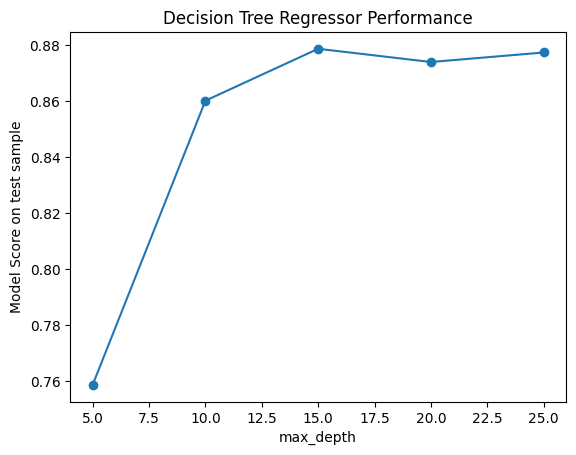

In [9]:
# Parameter optimization for Decision Tree Regressor. Here we vary the max_depth and compare performance

max_depth_values = [5, 10, 15, 20, 25]
scores = []

for max_depth in max_depth_values:
    dt_model = DecisionTreeRegressor(max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    test_score = dt_model.score(X_test, y_test)
    scores.append(test_score)

# Plot scores as a function of max_depth
plt.plot(max_depth_values, scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Model Score on test sample')
plt.title('Decision Tree Regressor Performance')
plt.show()

#### Coefficients' magnitudes for best obtained model.
- For decision tree regressions we cant get the feature coefficients like we do in linear regression
- Instead we have an equivalent attribute called feature importance, which can be thought as the magnitudes of coefficients
- So we get here the feature importance of best decision tree regression model.

In [10]:
# Find best max_depth based on test score and fit the best model
best_max_depth = max_depth_values[np.argmax(scores)] # np.argmax(scores) gives the index of maximum test score

best_dt_model = DecisionTreeRegressor(max_depth=best_max_depth) # Setting model with otimum depth
best_dt_model.fit(X_train, y_train) # Training best model
best_test_score=best_dt_model.score(X_test, y_test) #test sample performance for best model

print("Test set score for best model: {:.4f}".format(best_test_score))
print("Best max tree depth:",best_max_depth)


Test set score for best model: 0.8737
Best max tree depth: 15


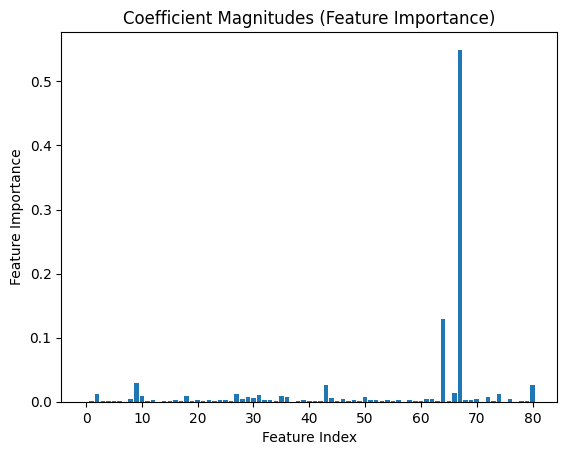

In [11]:
## Plotting feature importance (feature coefficient magnitudes)

feature_importances = best_dt_model.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Coefficient Magnitudes (Feature Importance)')
plt.show()

### Results of Task-1(b):
- we varied the parameter max tree depth and found that decision tree regression gives best performance when max tree depth is 20 out of the list [5, 10, 15, 20, 25]
- test score for best model is 0.8750.
- We plotted feature importance (equivalent to magnitudes of coefficient in linear regression) and observed that 67'th and 64'th features are most important.
- 67'th feature is 'range_ThermalConductivity' and 64'th feature is 'wtd_gmean_ThermalConductivity'

## Task 2 (10 points): Multiclass & binary classification 

##### Dataset:  Drug consumption (quantified)
* Number of records: 1885
* Number of features: 12 + 18 (target/output features)
* Repository URL: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29
* Reference: Fehrman, Elaine, Awaz K. Muhammad, Evgeny M. Mirkes, Vincent Egan, and Alexander N. Gorban. "The five factor model of personality and evaluation of drug consumption risk." In Data science: innovative developments in data analysis and clustering, pp. 231-242. Springer International Publishing, 2017.

##### Problems
__a.__ Select 2 out of 18 output features, then predict each selected feature by using a multiclass classification model. (Hint: Use numerical values to represent each class of an output feature) Report the accuracy with the default parameters of each model. (__Note__: two different multiclass classification models must be used) \
__b.__ Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the obtained accuracy as a function of the chosen parameter. \
__c.__ Train one multiclass classification model to predict 16 output features (exclude 2 output features from a). Comment on the accuracy of predicting each feature, for all the 7 classes. \
__d.__ Run one binary classification model for 3 out of 18 output features. Evaluate the performance of the model with different setups as follows. 
 - (class 0) the variables "Never Used" and "Used in Last Decade" and (class 1) the remaining variables.
 - (class 0) the variables "Never Used", "Used in Last Decade" and "Used in Last Year" and (class 1) the remaining variables.
 - (class 0) the variables "Never Used", "Used in Last Decade", "Used in Last Year" and "Used in Last Month" and (class 1) the remaining variables.
 
__NOTE__: Comment your results, and the best setups in d.

## Answer_Task-2

In [12]:

# fetch dataset 

drug_consumption = fetch_ucirepo(id=373) 
  
# data (as pandas dataframes) 
X = drug_consumption.data.features 
y = drug_consumption.data.targets 
  

In [13]:
# getting Features' information
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1885 non-null   float64
 1   gender     1885 non-null   float64
 2   education  1885 non-null   float64
 3   country    1885 non-null   float64
 4   ethnicity  1885 non-null   float64
 5   nscore     1885 non-null   float64
 6   escore     1885 non-null   float64
 7   oscore     1885 non-null   float64
 8   ascore     1885 non-null   float64
 9   cscore     1885 non-null   float64
 10  impuslive  1885 non-null   float64
 11  ss         1885 non-null   float64
dtypes: float64(12)
memory usage: 176.8 KB


In [14]:
# Getting targets information
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   alcohol    1885 non-null   object
 1   amphet     1885 non-null   object
 2   amyl       1885 non-null   object
 3   benzos     1885 non-null   object
 4   caff       1885 non-null   object
 5   cannabis   1885 non-null   object
 6   choc       1885 non-null   object
 7   coke       1885 non-null   object
 8   crack      1885 non-null   object
 9   ecstasy    1885 non-null   object
 10  heroin     1885 non-null   object
 11  ketamine   1885 non-null   object
 12  legalh     1885 non-null   object
 13  lsd        1885 non-null   object
 14  meth       1885 non-null   object
 15  mushrooms  1885 non-null   object
 16  nicotine   1885 non-null   object
 17  semer      1885 non-null   object
 18  vsa        1885 non-null   object
dtypes: object(19)
memory usage: 279.9+ KB


In [15]:
# getting a sample of features
X.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [16]:
X.describe() # description of features

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [17]:
y.head()   # Sample of target data

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [18]:
# Since we usualy need target value as numeric instead of object type so we strip 'CL' from data points.
# Following code will check each datapoint in the dataframe 
# if datapoint in a data is string following code will replace string  'CL' with empety string

y_new= y.map(lambda x: x.replace('CL', '') if isinstance(x, str) else x)

# Now we convert the resulting values of dataframe to numeric 
y_new = y_new.apply(pd.to_numeric)
y_new.head()


,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


###  Task-2(a)
- For task-2(a) I have chosen first two output features, 'alcohol' and 'amphet'. And I decided to use Random forest classifier for 'alcohol' multiclass and  KNN classifier for 'amphet' multiclass.

#### Clssification for alcohol using random forest

In [19]:
# Train test split for 'alcohol'
X_train, X_test, y_train, y_test = train_test_split(X, y_new.alcohol, test_size=0.2, random_state=0) # train test split in 80/20

#scaling not neccessary for tree based classifiers So we did not do it here.

# Random Forest Classifier for classifying 'alcohol' class
rc=RandomForestClassifier(n_estimators=100, random_state=0) # n_estimators=100 is the default value

rc.fit(X_train,y_train)  # Training the random forest

# Make predictions on the test set
y_predicted = rc.predict(X_test)


# Model accuracy score:
accuracy_rc = accuracy_score(y_test, y_predicted)
print('Random forest accuracy Score:', accuracy_rc)


Random forest accuracy Score: 0.363395225464191


#### Clssification for 'amphet drug using KNN classifier

In [20]:
## Classification for 'amphet' drug class

# Train test split for 'amphet'
X_train, X_test, y_train, y_test = train_test_split(X, y_new.amphet, test_size=0.2, random_state=0) # train test split in 80/20

# Scaling the data
scaler_X=StandardScaler()
scaler_X.fit(X_train)
X_train_scaled=scaler_X.transform(X_train)
X_test_scaled= scaler_X.transform(X_test)

# Initializing the KNN classifier using  default nearest neighbors as 5.
model_knn= KNeighborsClassifier(n_neighbors=5)

# Training the model on the training data
model_knn.fit(X_train_scaled, y_train)

# predicting y
y_predicted = model_knn.predict(X_test)

# Accuracy score on test data
accuracy_knn=accuracy_score(y_test, y_predicted)

print('accuracy score KNN classifier:',accuracy_knn)



accuracy score KNN classifier: 0.48010610079575594


### Results of Task-2(a):
- we selected two output features 'alcohol' and 'amphet'
- we used 'Random Forest Classifier' for 'alcohol' and KNN classifier for 'amphet' drug
- Accuracy score for 'alcohol' classification by random forest is 0.36, while the accuracy score for 'amphet' classification, using KNN is 0.48

### Task-2(b):
- Here I use the random Forest classifier for modelling 'alcohol' class, by manualy optimizing the accuracy using n_estimators (number of trees) from 50 to 1000.

In [21]:
# Creating an array to be used as different values of number of trees in random forest model to optimize the model manually.
n=np.arange(50,1050,25)
n

array([  50,   75,  100,  125,  150,  175,  200,  225,  250,  275,  300,
        325,  350,  375,  400,  425,  450,  475,  500,  525,  550,  575,
        600,  625,  650,  675,  700,  725,  750,  775,  800,  825,  850,
        875,  900,  925,  950,  975, 1000, 1025])

In [22]:
# Train test split for alcohol
X_train, X_test, y_train, y_test = train_test_split(X, y_new.alcohol, test_size=0.2, random_state=0) # train test split in 80/20
# Scaling is not neccessary for random forest


rc_accuracy=[]
for item in n:

# Random Forest Classifier for classifying 'alcohol' class
    rc=RandomForestClassifier(n_estimators=item, random_state=0)
    rc.fit(X_train,y_train)

# Make predictions on the test set
    y_predicted = rc.predict(X_test)

# Step 5: Compute the accuracy score
    accuracy_rc = accuracy_score(y_test, y_predicted)
    #print(f'Accuracy Score for {item} number of trees is {accuracy_rc}')
    rc_accuracy.append([item,accuracy_rc])
    df_accuracy=pd.DataFrame(rc_accuracy, columns=['no_estimators','accuracy'])
    
print(f'Maximum accuracy score is {df_accuracy.accuracy.max()} for number of trees = {df_accuracy[df_accuracy.accuracy==df_accuracy.accuracy.max()].no_estimators.iloc[0]}')


Maximum accuracy score is 0.38992042440318303 for number of trees = 1000


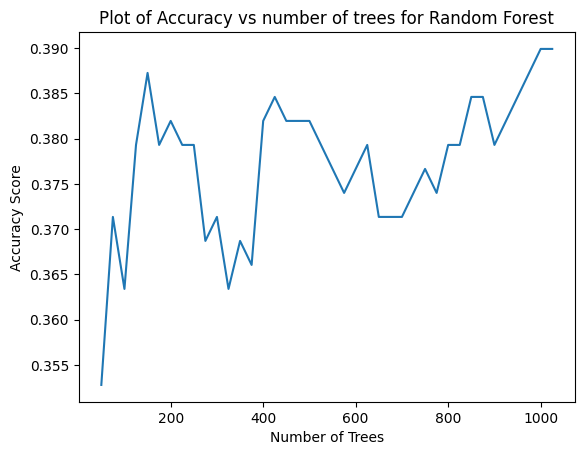

In [23]:
## Plotting the accuracy score as a function of parameter n_estimators
plt.plot(df_accuracy.no_estimators,df_accuracy.accuracy)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy Score")
plt.title("Plot of Accuracy vs number of trees for Random Forest")
plt.show()

### Discusssion on Results of Task-2(b):
- We used random forest classifier to classify 'alcohol' class and for optimisation we used different number of trees from 50 to 1025. And we found that accuracy score is highest (0.3899) for 1000 trees.
- However, the accuracy score was 0.36 with just 100 trees so by using 1000 trees we did not get very significant growth in accuracy, though using 1000 trees need more time in processing.

### Task-2(c)
- Here we have split the train test sample using same random state for all the drugs classification,  to have fair comparison among the accuracy scores
- We used Kernel SVM classification here. This SVM uses non linear kernels so can detect non linear relationships too.
- We are using here all outputs except 'alcohol' and 'amphet' as these were used in task-2(a)

In [24]:
y_new.columns[2:] #all columns except 'alcohol' and 'amphet' , since we have used 'alcohol' and 'amphet' in task-2(a).

Index(['amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack',
       'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms',
       'nicotine', 'semer', 'vsa'],
      dtype='object')

In [25]:
# Fitting Kernel SVM model and getting accuracy scores by using a loop for all drugs' names except 'alcohol' and 'amphet'.

accuracy_score_ksvc=[] # for collecting the accuracy scores and drug's names

for  item in y_new.columns[2:]:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_new[item], test_size=0.2, random_state=0) # train test split in 80/20

    # Scaling the data
    scaler_X=MinMaxScaler()
    scaler_X.fit(X_train)
    X_train_scaled=scaler_X.transform(X_train)
    X_test_scaled= scaler_X.transform(X_test)
    
    # Initializing Kernel SVM model
    model_svm = SVC(kernel='rbf', C=1, gamma='scale')  # C and gamma can be tuned

    # Training the model on the training data
    model_svm.fit(X_train_scaled, y_train)

    # Making predictions on the test set
    y_predicted = model_svm.predict(X_test_scaled)

    # Accuracy of the model
    accuracy_ksvc = accuracy_score(y_test, y_predicted)
    accuracy_score_ksvc.append([item,accuracy_ksvc])
    
    print(f'Kernel SVC model Accuracy score for drug/output_feature {item} is {accuracy_ksvc}')
    


Kernel SVC model Accuracy score for drug/output_feature amyl is 0.7082228116710876
Kernel SVC model Accuracy score for drug/output_feature benzos is 0.5729442970822282
Kernel SVC model Accuracy score for drug/output_feature caff is 0.7745358090185677
Kernel SVC model Accuracy score for drug/output_feature cannabis is 0.41644562334217505
Kernel SVC model Accuracy score for drug/output_feature choc is 0.41909814323607425
Kernel SVC model Accuracy score for drug/output_feature coke is 0.5994694960212201
Kernel SVC model Accuracy score for drug/output_feature crack is 0.8779840848806366
Kernel SVC model Accuracy score for drug/output_feature ecstasy is 0.5729442970822282
Kernel SVC model Accuracy score for drug/output_feature heroin is 0.8620689655172413
Kernel SVC model Accuracy score for drug/output_feature ketamine is 0.8010610079575596
Kernel SVC model Accuracy score for drug/output_feature legalh is 0.649867374005305
Kernel SVC model Accuracy score for drug/output_feature lsd is 0.644

### Discussion on Results of task-2(c)
- By observing the accuracy results we noted that minimum accuracy (0.3899) is for 'nicotine' and maximum accuracy (0.99) is for 'semer' drugs
- four least accuracy scores are for drugs 'nicotine','choc','cannabis' and 'benzos'

### Task-2(d)
- For this task, we selected the drugs 'cannabis','choc' and 'nicotine' as for these drugs the model accuracy score was very low in last task. So we wanted to see if there is some improvement in accuracy score after binary classification.
- In the data documentation on the website, seven classes [0,1,2,3,4,5,6] are  "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day" respectively.
- We have been given three kind of binary classifications i.e.
     - (class 0) the variables "Never Used" and "Used in Last Decade" and (class 1) the remaining variables.
     - (class 0) the variables "Never Used", "Used in Last Decade" and "Used in Last Year" and (class 1) the remaining variables.
    - (class 0) the variables "Never Used", "Used in Last Decade", "Used in Last Year" and "Used in Last Month" and (class 1) the remaining variables.
- We will take each binary classification one by one and classify all three drugs on choosen binary class. and then fit binary classification models.
- Hence for each drug we have three models, one for each kind of binary classification. i.e., overall we would have 9 models and corresponding accuracy scores.

#### First kind of Binary Classification
- Rule of making this kind of binary class is following:
    - (class 0) the variables "Never Used" and "Used in Last Decade" and (class 1) the remaining variables.
    - That means in terms of y_new data,  class-0 is clubbing the 0 and 2 classes and remaining clases are clubbed in Class-1

In [26]:
# Making new dataframe for storing binary classes (According to 1'st method) for three chosen drugs

#Initializing a new data frame to have the binary classes for chosen three  drugs
y_3drugs_binary1=pd.DataFrame()

# Creating binary classes as columns
y_3drugs_binary1['cannabis']= np.where((y_new['cannabis']==0) | (y_new['cannabis']==2) ,0,1)
y_3drugs_binary1['choc']=     np.where((y_new['choc']==0) | (y_new['choc']==2) ,0,1)
y_3drugs_binary1['nicotine']= np.where((y_new['nicotine']==0) | (y_new['nicotine']==2) ,0,1)

y_3drugs_binary1.head()

,cannabis,choc,nicotine
0,0,1,0
1,1,1,1
2,1,1,0
3,0,1,0
4,1,1,0


In [27]:
# Using logistic regression for two class classifications 
# we use a loop for chosen drugs.

Accuracy_binary1=[]
for item in y_3drugs_binary1.columns:
    
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_3drugs_binary1[item], test_size=0.2, random_state=0)
    
    #Scaling
    scaler_X=MinMaxScaler()
    scaler_X.fit(X_train)
    X_train_scaled=scaler_X.transform(X_train)
    X_test_scaled= scaler_X.transform(X_test)
    
    # model initialisation
    model_log = LogisticRegression()
    
    #Training the model
    model_log.fit(X_train_scaled,y_train)
    
    # Predicted y
    y_predicted=model_log.predict(X_test_scaled)
    
    # Accuracy score
    accuracy_log = accuracy_score(y_test, y_predicted)
    Accuracy_binary1.append([item,accuracy_log])
    print(f"Accuracy for drug {item}: {accuracy_log:.4f}")

accuracy_binary1=pd.DataFrame(Accuracy_binary1,columns=['drug','accuracy_binary1'])
print('\n________________________________________________________________')
print(accuracy_binary1)

Accuracy for drug cannabis: 0.8064
Accuracy for drug choc: 0.9814
Accuracy for drug nicotine: 0.7321

________________________________________________________________
       drug  accuracy_binary1
0  cannabis          0.806366
1      choc          0.981432
2  nicotine          0.732095


#### Second kind of Binary Classification
- Rule of making this kind of binary class is following:
    - (class 0) the variables "Never Used", "Used in Last Decade" and "Used in Last Year" and (class 1) the remaining variables.
    - That means in terms of y_new data class-0 is clubbing the 0, 2 and 3 classes and remaining clases are clubbed in Class-1

In [28]:
# Making new dataframe for storing binary classes (According to 2'nd method) for three chosen drugs

#Initializing a new data frame to have the binary classes for chosen three  drugs
y_3drugs_binary2=pd.DataFrame()

# Creating binary classes as columns
y_3drugs_binary2['cannabis']= np.where(y_new['cannabis'].isin([0,2,3]) ,0,1)
y_3drugs_binary2['choc']=     np.where(y_new['choc'].isin([0,2,3]) ,0,1)
y_3drugs_binary2['nicotine']= np.where(y_new['nicotine'].isin([0,2,3]) ,0,1)

y_3drugs_binary2.head()

,cannabis,choc,nicotine
0,0,1,0
1,1,1,1
2,0,1,0
3,0,1,0
4,0,1,0


In [29]:
## Using logistic regression for binary classification

Accuracy_binary2=[]  # for storing drug name and accuracy scores

for item in y_3drugs_binary2.columns:    # loop for chosen drugs
    
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_3drugs_binary2[item], test_size=0.2, random_state=0)
    
    #Scaling
    scaler_X=MinMaxScaler()
    scaler_X.fit(X_train)
    X_train_scaled=scaler_X.transform(X_train)
    X_test_scaled= scaler_X.transform(X_test)
    
    # model initialisation
    model_log = LogisticRegression()
    
    #Training the model
    model_log.fit(X_train_scaled,y_train)
    
    # Predicted y
    y_predicted=model_log.predict(X_test_scaled)
    
    # Accuracy score
    accuracy_log = accuracy_score(y_test, y_predicted)
    Accuracy_binary2.append([item,accuracy_log])
    print(f"Accuracy for drug {item}: {accuracy_log:.4f}")
    
accuracy_binary2=pd.DataFrame(Accuracy_binary2,columns=['drug','accuracy_binary2'])
print('\n________________________________________________________________')
print(accuracy_binary2)


Accuracy for drug cannabis: 0.7321
Accuracy for drug choc: 0.9523
Accuracy for drug nicotine: 0.6419

________________________________________________________________
       drug  accuracy_binary2
0  cannabis          0.732095
1      choc          0.952255
2  nicotine          0.641910


#### Third kind of Binary Classification
- Rule of making this kind of binary class is following:
    - (class 0) the variables "Never Used", "Used in Last Decade", "Used in Last Year" and "Used in Last Month" and (class 1) the remaining variables.
    - That means in terms of y_new data class-0 is clubbing the 0, 2, 3 and 4 classes and remaining clases are clubbed in Class-1

In [30]:
# Making new dataframe for storing binary classes (According to 3'rd method) for three chosen drugs

#Initializing a new data frame to have the binary classes for chosen three  drugs
y_3drugs_binary3=pd.DataFrame()

# Creating binary classes as columns
y_3drugs_binary3['cannabis']= np.where(y_new['cannabis'].isin([0,2,3,4]) ,0,1)
y_3drugs_binary3['choc']=     np.where(y_new['choc'].isin([0,2,3,4]) ,0,1)
y_3drugs_binary3['nicotine']= np.where(y_new['nicotine'].isin([0,2,3,4]) ,0,1)

y_3drugs_binary3.head()

,cannabis,choc,nicotine
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [31]:
Accuracy_binary3=[]

for item in y_3drugs_binary3.columns:
    
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_3drugs_binary3[item], test_size=0.2, random_state=0)
    
    #Scaling
    scaler_X=MinMaxScaler()
    scaler_X.fit(X_train)
    X_train_scaled=scaler_X.transform(X_train)
    X_test_scaled= scaler_X.transform(X_test)
    
    # model initialisation
    model_log = LogisticRegression()
    
    #Training the model
    model_log.fit(X_train_scaled,y_train)
    
    # Predicted y
    y_predicted=model_log.predict(X_test_scaled)
    
    # Accuracy score
    accuracy_log = accuracy_score(y_test, y_predicted)
    Accuracy_binary3.append([item,accuracy_log])
    print(f"Accuracy for drug {item}: {accuracy_log:.4f}")
    
accuracy_binary3=pd.DataFrame(Accuracy_binary3,columns=['drug','accuracy_binary3'])
print('________________________________________________________________')
print(accuracy_binary3)


Accuracy for drug cannabis: 0.6870
Accuracy for drug choc: 0.7666
Accuracy for drug nicotine: 0.6127
________________________________________________________________
       drug  accuracy_binary3
0  cannabis          0.687003
1      choc          0.766578
2  nicotine          0.612732


#### Clubbing all the results of Task-2(d)

In [32]:
## Merging accuracy scores of all three kind of binary classification
accuracy_compare=pd.merge(accuracy_binary1,accuracy_binary2)
accuracy_compare= pd.merge(accuracy_compare,accuracy_binary3)
accuracy_compare.set_index('drug',inplace=True)
print(accuracy_compare)

          accuracy_binary1  accuracy_binary2  accuracy_binary3
drug                                                          
cannabis          0.806366          0.732095          0.687003
choc              0.981432          0.952255          0.766578
nicotine          0.732095          0.641910          0.612732


### Comments on answers of 2(d):
- binary classes have better accuracy scores. We selected drugs ('cannabis','choc' and 'nicotine') for binary classification which had less than 50% accuracy score in multiclass classification in task-2(c).
- After binary classification, accuracy score of these three drugs' classification ranges between 61% to 98% in different setups.
- Best Setup: binary classification using first method i.e., 'class 0 (the variables "Never Used" and "Used in Last Decade") and class 1 (the remaining variables) was the best across all the three chosen drugs (cannebis, choc, nicotine) as this setup has best accuracy scores in all three drugs classification.

## Task 3 (5 points): Data normalization

##### Dataset: Linnerud 
* Number of records: 20
* Number of features: 3 + 3 (target/output features)
* Repository URL: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html 

##### Problems
__a.__ Look at features of Linnerud dataset, explore them and describe their characteristics. \
__b.__ Normalize these features using an appropriate method. Plot the probability density function of each feature with original and normalized data side-by-side.

# Answer_Task-3:
### Data description:
- data is from 20 middle aged men in a fitness club.
- Features are the measurement of three excersizes Chins, Situps and Jumps which the men do in the fitness club
- Target variables are their Weight, Waist and Pulse observations.

In [33]:
##Loading the data and making features X and target y 
linnerud = load_linnerud()
X=linnerud.data
y=linnerud.target
print('Dimensions of features X:',X.shape)
print('Dimensions of target y:',y.shape)

## Both X and y have 20 rows and 3 columns

Dimensions of features X: (20, 3)
Dimensions of target y: (20, 3)


In [34]:
# Checking data type
print(X.dtype)
print(y.dtype)

float64
float64


In [35]:
## Checking if there are missing values

missing_feature_values=np.isnan(X).sum()
missing_targets_values=np.isnan(y).sum()
print('missing value count in features:',missing_feature_values)
print('\nmissing value count in targets:',missing_targets_values)

# No missing values

missing value count in features: 0

missing value count in targets: 0


In [36]:
# Converting features array X into dataframe to describe them more in detail
linnerud_features=pd.DataFrame(X,columns=['chins','situps','jumps'])
linnerud_targets=pd.DataFrame(y,columns=['weight','waist','pulse'])
print(linnerud_features.head())
print('________________________________________________')
print(linnerud_targets.head())

   chins  situps  jumps
0    5.0   162.0   60.0
1    2.0   110.0   60.0
2   12.0   101.0  101.0
3   12.0   105.0   37.0
4   13.0   155.0   58.0
________________________________________________
   weight  waist  pulse
0   191.0   36.0   50.0
1   189.0   37.0   52.0
2   193.0   38.0   58.0
3   162.0   35.0   62.0
4   189.0   35.0   46.0


In [37]:
# Major characterstics of features X
linnerud_features.describe()

,chins,situps,jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


array([[<Axes: title={'center': 'chins'}>,
        <Axes: title={'center': 'situps'}>],
       [<Axes: title={'center': 'jumps'}>, <Axes: >]], dtype=object)

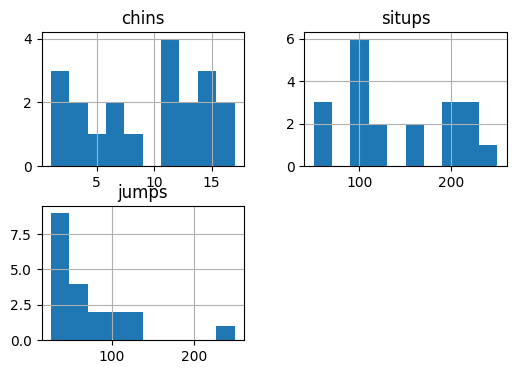

In [38]:
## Histograms of X features to get an idea about shape of data distributions
linnerud_features.hist(figsize=(6,4)) 

In [39]:
## Corelation among features X
linnerud_features.corr()

,chins,situps,jumps
chins,1.000000,0.695727,0.495760
situps,0.695727,1.000000,0.669206
jumps,0.495760,0.669206,1.000000


#### characterstics of target variables

In [40]:
## Descibing target variables
linnerud_targets.describe()

,weight,waist,pulse
count,20.000000,20.000000,20.000000
mean,178.600000,35.400000,56.100000
std,24.690505,3.201973,7.210373
min,138.000000,31.000000,46.000000
25%,160.750000,33.000000,51.500000
50%,176.000000,35.000000,55.000000
75%,191.500000,37.000000,60.500000
max,247.000000,46.000000,74.000000


array([[<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'waist'}>],
       [<Axes: title={'center': 'pulse'}>, <Axes: >]], dtype=object)

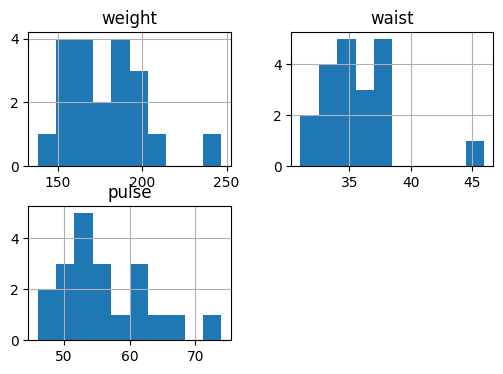

In [41]:
# histograms for targets
linnerud_targets.hist(figsize=(6,4))

In [42]:
## Corelation among targets
linnerud_targets.corr()

,weight,waist,pulse
weight,1.000000,0.870243,-0.365762
waist,0.870243,1.000000,-0.352892
pulse,-0.365762,-0.352892,1.000000


### Discussion on the results of Task-3(a):
- Dimensions of features is 20 observations and total 3 features. Similarly for the targets as well 20 observations and 3 targets.
- Data type for features and targets both are float type.
- There are no missing values in features' data and targets' data
- Mean, minimum and maximum values for features-
    - means of the three features (Chins, situps and jumps) are 9.43, 145.5 and 70.0 respectively
    - minimum values of the three features (Chins, situps and jumps) are 1.0, 50.0 and 25.0  respectively
    - maximum values of the three features (Chins, situps and jumps) are 17.0, 251.0 and 250.0 respectively
- Mean, minimum and maximum values for targets-
    - means of the three targets (weight, waist and pulse) are 178.6, 35.4 and 56.1 respectively
    - minimum values of the three targets (weight, waist and pulse) are 138.0, 31.0 and 46.0  respectively
    - maximum values of the three targets (weight, waist and pulse) are 247.0, 46.0 and 74.0 respectively 
- by looking at histograms of both features and target data, we found that all the features and targets are not symmetricaly distributed and have few outliers.
- In features' data chins and situps are highly corelated with correlation= 0.69 and similarly situps and jumps have high correlation (0.669).
- In targets data weight and waist are highly corelated (0.87) however, weight and pulse and waist and pulse are negatively corelated. So high weight implies high waist but low pulse.


### Task-3(b)
- data doesnt seem to be normal, nor symmetric and neither having negative values.
- Though, data is strictly positive
- So minmax scaler might be more suitable

In [43]:
#Fitting minmax scaler to input and target features and transforming data
Scaler_X=MinMaxScaler()
Scaler_y=MinMaxScaler()

linnerud_features_scaled=Scaler_X.fit_transform(linnerud_features)
linnerud_targets_scaled=Scaler_y.fit_transform(linnerud_targets)

#Making data frames of features
linnerud_features_scaled=pd.DataFrame(linnerud_features_scaled,columns=['chins','situps','jumps']) #Input features

linnerud_targets_scaled=pd.DataFrame(linnerud_targets_scaled,columns=['weight','waist','pulse']) # Output features


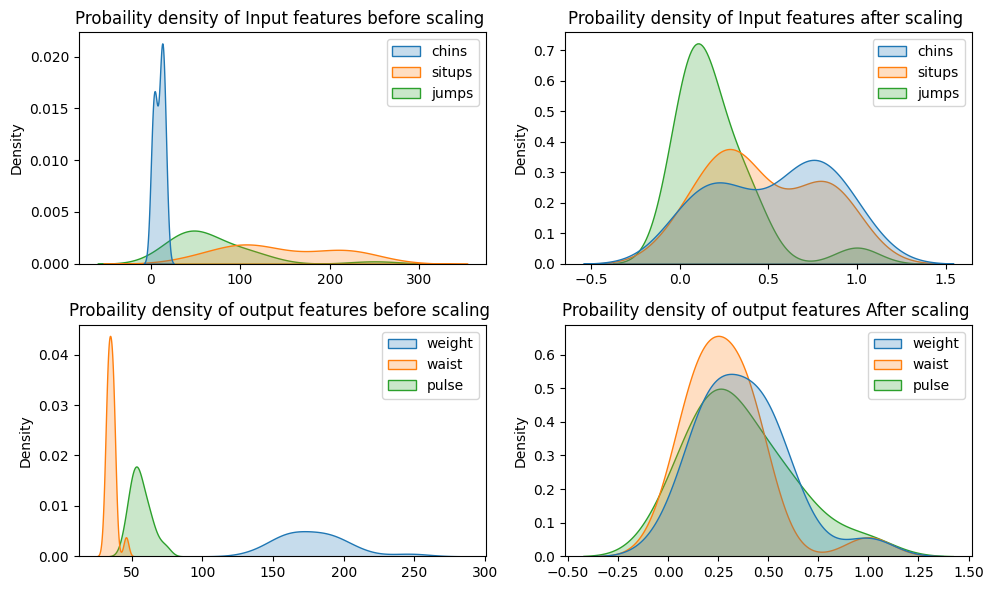

In [44]:
# density plots before scaling and after scaling for input features and output features using Seaborn library.



fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.kdeplot(linnerud_features,ax=axes[0,0], fill=True)
axes[0,0].set_title("Probaility density of Input features before scaling ")

sns.kdeplot(linnerud_features_scaled, ax=axes[0,1], fill=True)
axes[0,1].set_title("Probaility density of Input features after scaling ")

sns.kdeplot(linnerud_targets, ax=axes[1,0], fill=True)
axes[1,0].set_title("Probaility density of output features before scaling ")

sns.kdeplot(linnerud_targets_scaled, ax=axes[1,1], fill=True)
axes[1,1].set_title("Probaility density of output features After scaling ")

plt.tight_layout() # For auto adjustment of subplots
plt.show() # Showing the subplots


### Discussion on Results of Task-3:
- By seeing the above pdf, data doesnt seem to be normal, nor symmetric and neither having negative values for both features and targets.
- Data is strictly positive,therefore, minmax scaler is used to scale the targets and features too.
- kernel density plots in Seaborn is used to plot pdf of features and targets.
- We may observe that after scaling the spread of all features are same and spread of all targets are also similar.

## Task 4 ( 10 points):  Dimensionality reduction and clustering
Change this into another dataset.

##### Dataset: The Olivetti faces dataset
* Number of records: 400
* Number of features: 4096
* Repository URL: https://scikit-learn.org/stable/datasets/real_world.html

##### Problems
__a.__ Use KernelPCA\* for dimensionality reduction. Train a classifier at different numbers (at least 5 values) of dimensions, then check how model score changes as a function of the number of dimensions. \  
__b.__ Cluster the dataset into 40 clusters for at least 2 of the reduced data (done by KernelPCA in a). Print true class vs cluster distribution. Did you manage to recover the original clusters? Describe and comment your results. 

# Answer_Task-4:

### Task-4(a)

#### Dimensionality reduction of features:
- There are 4096 features for every observation and just 400 total sample size so we need to reduce the dimensions to avoid overfitting.
- features for faces is highly non linear so we may use a nonlinear dimentionality reduction technique called KernelPCA to reduce the dimensions and keep the nonlinear structure too

In [45]:
# Loading the data
olivfaces = fetch_olivetti_faces() ### loading the faces' dataset
X = olivfaces.data   # X or features is numpy array of dimensions (400, 4096) features are set of 4096 pixels
y = olivfaces.target # y is mumpy array of  Labels with dimensions(400,),  grouping faces into 40 types. 

In [46]:
# Features are pixels whose values are between 0 and 1
print(f'values of features lying between  {X.min()} and {X.max()}')

values of features lying between  0.0 and 1.0


In [47]:
# Train test split in 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # train test split in 80/20

#Scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [48]:
# extracting principal components using kernel PCA
# and then  using Support Vector Machine(SVC) with gussian kernel as multi class classifier
# And check the model scores on test sample for different numbers of principal components.

# following is list of number of PCA to be extracted. we took perfect squares in list as faces have square matrix of pixels
n=[4,25,49,64,81,100,144,196,225,256] 

mylist=[] # initialising list to collect model scores for the different numbers of PC.

for i in n:
    olive_kpca= KernelPCA(n_components=i, kernel='rbf')# Using Gaussian radius basis function  and default noise parameter gamma=0.01
    
    X_olive_kpca_train = olive_kpca.fit_transform(X_train) #transformaing features and extracting principal components for training sample
    X_olive_kpca_test =olive_kpca.transform(X_test) # PC for test samples
    
    model = SVC(kernel='rbf', C=1, gamma='scale', random_state=0) ## initializing classifier (kernel SVC)
   
    # training the SVM model on the scaled training data
    model.fit(X_olive_kpca_train, y_train)
    
    model_score = model.score(X_olive_kpca_test,y_test) # model performance on test data
    
    print(f'Model Score with {i} principal components: {model_score:.4f}') #printing the model scores on test data
    
    mylist.append([i,model_score]) # collecting numbers of PCA and model scores in mylist
    
mylist=np.array(mylist)

# Finding the dimensions of PCA for which model score was maximum
best_dimension_kpca = mylist[np.argmax(mylist[:,1]),0]
print('_______________________________________________________________\n',)
print('Best dimension of PC:',best_dimension_kpca)

    

Model Score with 4 principal components: 0.4500
Model Score with 25 principal components: 0.8875
Model Score with 49 principal components: 0.9000
Model Score with 64 principal components: 0.9000
Model Score with 81 principal components: 0.9000
Model Score with 100 principal components: 0.8875
Model Score with 144 principal components: 0.8875
Model Score with 196 principal components: 0.8875
Model Score with 225 principal components: 0.8875
Model Score with 256 principal components: 0.8875
_______________________________________________________________

Best dimension of PC: 49.0


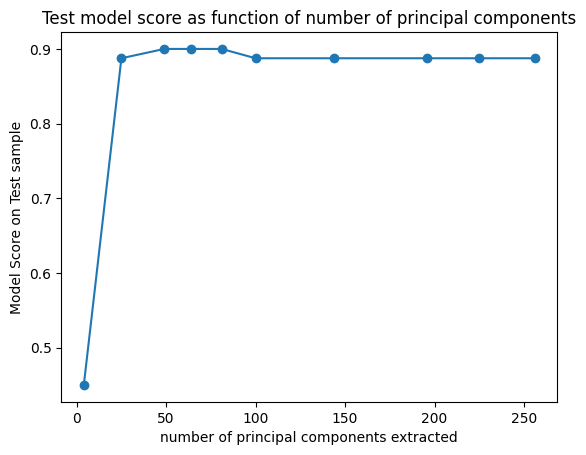

In [49]:
## Plotting model scores with different dimensions of principal components
## This will tell how model score behaves as a function of PC dimensions

plt.plot(mylist[:,0], mylist[:,1], marker='o')
plt.xlabel('number of principal components extracted')
plt.ylabel('Model Score on Test sample')
plt.title('Test model score as function of number of principal components')
plt.show()


### Results_discussion_Task-4(a):
- We used Kernel PCA to reduce the dimensions of data and then used kernen support vector machine classifier for multiclass classification.
- nonlinear SVC is used because principal components of kernel PCA are of highly nonlinear nature.
- We used a list of 5 possible number of principal components to be extracted i.e., [4,24,49,64,81,100,144,196,225,256].
- We have chosen perfect squares in our list as originaly the pixels are in square matrix form (64*64=4096), so we wanted to preseve that square structure.
- We found that out of above list, extracting 49 principal components from kernel PCA is optimum as it gives highest model score on test data.
- We observed that at the 4 components score was minimum (0.45), then it started growing with increasing number of principal components, it reached maximum score (0.90) at 49 components and remains constant till 81 principal components, then the score dropped further to 0.8875 and remains constant afterwards.

## Task-4(b)

- On the basis of accuracy scores of task 4(a) we have chosen 49 and 100 number of principal components to check.

#### For 49 principal components. Using Kmeans method of clustering.

In [50]:

# Scaling X features for Kernel PCA
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

olive_kpca= KernelPCA(n_components=49, kernel='rbf')# Using Gaussian radius basis function and default noise parameter gamma=0.01  
X_olive_kpca = olive_kpca.fit_transform(X_scaled) #transformaing features and extracting principal components

#Scaling principal components for clustering using minmax scaler
# Since each component has different variance so it seems appropriate to scale the principlal components
X_olive_kpca_scaled=scaler.fit_transform(X_olive_kpca)

# initializing Kmeans model
olive_km = KMeans(n_clusters=40, random_state=0)

#Training
olive_km.fit(X_olive_kpca_scaled)

# Get cluster labels
cluster_labels = olive_km.labels_



#### Printing true class vs cluster distribution

In [51]:
# Compare clusters with the true labels using a confusion matrix

confusion_rbf = confusion_matrix(y, cluster_labels)

# Convert confusion matrices to DataFrames for better visualization
df_confusion_rbf = pd.DataFrame(confusion_rbf, index=[f"True_{i}" for i in range(40)], columns=[f"Cluster_{i}" for i in range(40)])

# Display the confusion matrix to observe true class vs. cluster distribution
print("True class vs. cluster distribution (RBF Kernel PCA):")
print(df_confusion_rbf)

True class vs. cluster distribution (RBF Kernel PCA):
         Cluster_0  Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  \
True_0           0          0          0          0          5          0   
True_1           0          0          0          0          0          0   
True_2           0          0          0          2          0          0   
True_3           0          0          0          8          0          0   
True_4           0          1          0          0          0          0   
True_5           0          0          0          0          0          0   
True_6           0          0          0          0          0          0   
True_7           0          0          0          1          0          0   
True_8           0          0          0          0          0          0   
True_9           0          1          0          1          0          0   
True_10          0          0          0          0          0          0   
True_11          0    

In [52]:
# Checking if we could identify any true cluster
comp=cluster_labels==y
print('truely identified clusters in 400 observations =',sum(comp))


truely identified clusters in 400 observations = 13


#### For 100 principal components. Using Kmeans method of clustering.

In [53]:
## extracting 100 principal component using kernel PCA
olive_kpca= KernelPCA(n_components=100, kernel='rbf')# Using Gaussian radius basis function and default noise parameter gamma=0.01  
X_olive_kpca = olive_kpca.fit_transform(X_scaled) #transformaing features and extracting principal components

#Scaling principal components for clustering
X_olive_kpca_scaled=scaler.fit_transform(X_olive_kpca)

# initializing Kmeans model
olive_km = KMeans(n_clusters=40, random_state=0)

#Training
olive_km.fit(X_olive_kpca_scaled)

# Get cluster labels
cluster_labels = olive_km.labels_


#### Printing true class vs cluster distribution for clustering using 100 principal components

In [54]:
# Compare clusters with the true labels using a confusion matrix

confusion_rbf100 = confusion_matrix(y, cluster_labels)

# Convert confusion matrices to DataFrames for better visualization
df_confusion_rbf100 = pd.DataFrame(confusion_rbf100, index=[f"True_{i}" for i in range(40)], columns=[f"Pred_Clust_{i}" for i in range(40)])

# Display the confusion matrix to observe true class vs. cluster distribution
print("True class vs. cluster distribution (RBF Kernel PCA):")
print(df_confusion_rbf100)

True class vs. cluster distribution (RBF Kernel PCA):
         Pred_Clust_0  Pred_Clust_1  Pred_Clust_2  Pred_Clust_3  Pred_Clust_4  \
True_0              0             0             0             0             3   
True_1              0             0             0             0             2   
True_2              0             0             0             0             0   
True_3              0             0             0             0             0   
True_4              0             0             0             0             0   
True_5              0             0             0             0             0   
True_6              0             0             0             1             0   
True_7              0             0             0             0             0   
True_8              0             0             0             8             0   
True_9              0             1             0             0             0   
True_10             0             0             0      

In [55]:
# Checking if we could identify any true cluster
comp=cluster_labels==y
print('truely identified clusters in 400 observations =',sum(comp))

# Here we can identify the correct labels of 20 observations

truely identified clusters in 400 observations = 20


### Discussion on Results of Task-4(b):
- we used two reduced datasets. first by using 49 principal components and two by using 100 principal components because 49 principal component gave best test score in task-4(a) and 100 principal components gave second best test score in task-4(a).
- We used popular Kmeans method for clustering here.
- distribution of true class and predicted labels were observed and we found that by using 49 clusters we could identify true labels only for 13 observations. While by using 100 principal components we could identify true labels for 20 observations.
- Therefore, we are able to recover original clusters only in 20 observations out of 400 observations, which seems to be very low percentage.
